In [94]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# Nova seção

In [95]:
data = wb.DataReader('PG', data_source='yahoo', start='2000-1-1')

In [96]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,53.96875,52.84375,53.90625,53.59375,4275000.0,30.625511
2000-01-04,54.18750,51.87500,53.18750,52.56250,4270800.0,30.036228
2000-01-05,52.68750,51.25000,52.43750,51.56250,5098400.0,29.464787
2000-01-06,54.71875,52.53125,52.56250,53.93750,6524200.0,30.821951
2000-01-07,58.50000,54.59375,54.78125,58.25000,9832000.0,33.286285


In [97]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-16,138.270004,136.710007,136.710007,137.270004,5382500.0,137.270004
2020-12-17,139.119995,137.949997,138.009995,138.250000,7405300.0,138.250000
2020-12-18,140.070007,137.449997,138.259995,139.039993,19988800.0,139.039993
2020-12-21,138.429993,136.220001,137.960007,137.520004,6732400.0,137.520004
2020-12-22,138.070007,136.380005,137.289993,136.550003,5023100.0,136.550003


In [98]:
data['Resultado'] = (data['Adj Close']/data['Adj Close'].shift(1))-1
print(data['Resultado'])

Date
2000-01-03         NaN
2000-01-04   -0.019242
2000-01-05   -0.019025
2000-01-06    0.046061
2000-01-07    0.079954
                ...   
2020-12-16    0.004537
2020-12-17    0.007139
2020-12-18    0.005714
2020-12-21   -0.010932
2020-12-22   -0.007054
Name: Resultado, Length: 5278, dtype: float64


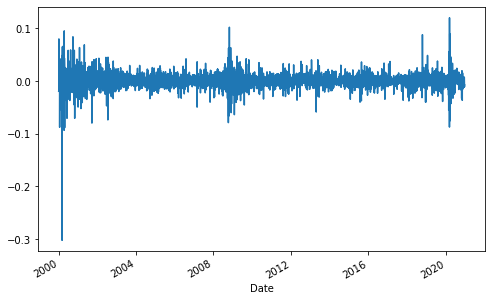

In [99]:
data['Resultado'].plot(figsize=(8,5))
plt.show()

In [100]:
media_simples = data['Resultado'].mean()
print(media_simples)

0.00037741218197280356


In [101]:
media_simples = data['Resultado'].mean()*250 
print(media_simples)

0.0943530454932009


In [102]:
print(str(round(media_simples, 5)*100)+'%')

9.435%


In [103]:
data['RetLogaritmico'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
print(data['RetLogaritmico'])

Date
2000-01-03         NaN
2000-01-04   -0.019429
2000-01-05   -0.019208
2000-01-06    0.045031
2000-01-07    0.076918
                ...   
2020-12-16    0.004527
2020-12-17    0.007114
2020-12-18    0.005698
2020-12-21   -0.010992
2020-12-22   -0.007079
Name: RetLogaritmico, Length: 5278, dtype: float64


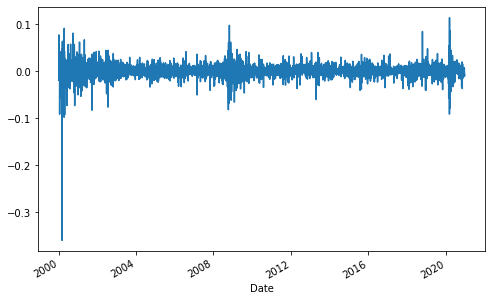

In [104]:
data['RetLogaritmico'].plot(figsize=(8,5))
plt.show()

In [105]:
medialog = data['RetLogaritmico'].mean()*250
print(str(round(medialog, 5)*100)+'%')

7.081999999999999%


In [106]:
carteiras = ['PG', 'MSFT', 'F', 'GE', 'AAPL']
database = pd.DataFrame()

In [107]:
for i in carteiras:
  database[i] = wb.DataReader(i, data_source='yahoo', start='2000-1-1')['Adj Close']

In [108]:
database.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5278 entries, 2000-01-03 to 2020-12-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      5278 non-null   float64
 1   MSFT    5278 non-null   float64
 2   F       5278 non-null   float64
 3   GE      5278 non-null   float64
 4   AAPL    5278 non-null   float64
dtypes: float64(5)
memory usage: 247.4 KB


In [109]:
database.head()

,PG,MSFT,F,GE,AAPL
Date,,,,,
2000-01-03,30.625511,37.102634,15.069453,26.190701,0.862170
2000-01-04,30.036228,35.849308,14.565937,25.143076,0.789479
2000-01-05,29.464787,36.227283,14.619884,25.099417,0.801033
2000-01-06,30.821951,35.013741,14.637873,25.434988,0.731713
2000-01-07,33.286285,35.471302,15.716831,26.419868,0.766373


In [110]:
database.tail()

,PG,MSFT,F,GE,AAPL
Date,,,,,
2020-12-16,137.270004,219.279999,9.04,10.919954,127.809998
2020-12-17,138.250000,219.419998,9.08,10.870000,128.699997
2020-12-18,139.039993,218.589996,8.95,10.810000,126.660004
2020-12-21,137.520004,222.589996,8.93,10.770000,128.229996
2020-12-22,136.550003,223.940002,8.79,10.610000,131.880005


In [111]:
ret_carteiras = (database/database.shift(1))-1
ret_carteiras.head()

,PG,MSFT,F,GE,AAPL
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.019242,-0.033780,-0.033413,-0.040000,-0.084311
2000-01-05,-0.019025,0.010543,0.003704,-0.001736,0.014634
2000-01-06,0.046061,-0.033498,0.001230,0.013370,-0.086539
2000-01-07,0.079954,0.013068,0.073710,0.038721,0.047369


In [112]:
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
np.dot(ret_carteiras, pesos)

array([        nan, -0.04214902,  0.00162399, ..., -0.00675123,
        0.00276551, -0.00061153])

In [113]:
media_carteiras = ret_carteiras.mean()*100
print(media_carteiras)

PG      0.037741
MSFT    0.053065
F       0.024942
GE      0.005297
AAPL    0.129626
dtype: float64


In [114]:
mediaretornoanual = ret_carteiras.mean() * 250
print(mediaretornoanual)

PG      0.094353
MSFT    0.132661
F       0.062356
GE      0.013243
AAPL    0.324064
dtype: float64


In [115]:
portfolio = str(round(np.dot(mediaretornoanual, pesos), 5)*100)+'%'
print(portfolio)

12.534%


In [116]:
pesos2 = np.array([0.3, 0.3, 0.15, 0.05, 0.2])
portfolio2 = str(round(np.dot(mediaretornoanual, pesos2), 5)*100)+'%'
print(portfolio2)

14.293%


In [117]:
ind_carteiras = ['^GSPC', '^IXIC', '^GDAXI']
indicadores = pd.DataFrame()

In [118]:
for t in ind_carteiras:
    indicadores[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

indicadores.head()


,^GSPC,^IXIC,^GDAXI
Date,,,
2000-01-03,1455.219971,4131.149902,6750.759766
2000-01-04,1399.420044,3901.689941,6586.950195
2000-01-05,1402.109985,3877.540039,6502.069824
2000-01-06,1403.449951,3727.129883,6474.919922
2000-01-07,1441.469971,3882.620117,6780.959961


In [119]:
indicadores.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2020-12-16,3701.169922,12658.190430,13565.980469
2020-12-17,3722.479980,12764.750000,13667.250000
2020-12-18,3709.409912,12755.639648,13630.509766
2020-12-21,3694.919922,12742.519531,13246.299805
2020-12-22,3687.260010,12807.919922,13418.110352


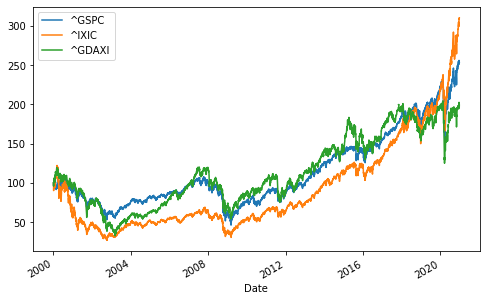

In [120]:
(indicadores/indicadores.iloc[0]*100).plot(figsize=(8,5))
plt.show()

In [121]:
retindicadores = (indicadores/indicadores.shift(1))-1
retindicadores.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2020-12-16,0.001773,0.005012,0.015200
2020-12-17,0.005758,0.008418,0.007465
2020-12-18,-0.003511,-0.000714,-0.002688
2020-12-21,-0.003906,-0.001029,-0.028187
2020-12-22,-0.002073,0.005132,0.012970


In [122]:
retindicadores_anuais = retindicadores.mean()*250
print(retindicadores_anuais)

^GSPC     0.063736
^IXIC     0.085676
^GDAXI    0.046586
dtype: float64


In [123]:
carteiras = ['PG', 'AAPL']
database = pd.DataFrame()

In [124]:
for i in carteiras:
    database[i] = wb.DataReader(i, data_source='yahoo', start='2010-1-1')['Adj Close']
database.tail()

,PG,AAPL
Date,,
2020-12-16,137.270004,127.809998
2020-12-17,138.250000,128.699997
2020-12-18,139.039993,126.660004
2020-12-21,137.520004,128.229996
2020-12-22,136.550003,131.880005


In [125]:
retorno = np.log(database/database.shift(1))
print(retorno)

                  PG      AAPL
Date                          
2010-01-04       NaN       NaN
2010-01-05  0.000327  0.001727
2010-01-06 -0.004754 -0.016034
2010-01-07 -0.005438 -0.001850
2010-01-08 -0.001323  0.006626
...              ...       ...
2020-12-16  0.004527 -0.000548
2020-12-17  0.007114  0.006939
2020-12-18  0.005698 -0.015978
2020-12-21 -0.010992  0.012319
2020-12-22 -0.007079  0.028067

[2763 rows x 2 columns]


In [131]:
retorno['PG'].mean()
retorno['PG'].mean()*250
retorno['PG'].std()
retorno['PG'].std()*250**0,5

retorno['AAPL'].mean()
retorno['AAPL'].mean()*250
retorno['AAPL'].std()
retorno['AAPL'].std()*250**0,5

print('Média PG', retorno['PG'].mean()*250)
print('Média AAPL', retorno['AAPL'].mean()*250)
print('Média entre PG e AAPL', retorno[['PG', 'AAPL']].mean()*250)
print('Desvio Padrão entre PG e AAPL', retorno[['PG', 'AAPL']].std()*250**0,5)

Média PG 0.10346576973630221
Média AAPL 0.2711639573683354
Média entre PG e AAPL PG      0.103466
AAPL    0.271164
dtype: float64
Desvio Padrão entre PG e AAPL PG      0.010814
AAPL    0.017850
dtype: float64 5
